In [60]:
from hex_plot import plot_map
import pickle
import random

In [12]:
max_radius = 20
hex_radius = 1

In [14]:
# Initialize agent (robot) parameters

# SI units:
# meters, seconds, 

G_FORCE = 9.8 # m/s^2

# The maximum lateral acceleration for the robot in terms of g-force
a_max_lateral = .5 * G_FORCE

# Acceleration ability at full throttle - for simplicity this is assumed to increase velocity linearly and without diminishing at higher velocities
max_acceleration = 3 # m/s^2

# Deceleration at full brake force, assumed linear
max_deceleration = 5 # m/s^2

In [15]:
agent_start_loc = (0, -max_radius) # bottom left of the map
goal_loc = (0,max_radius) # top right of the map

In [16]:
# Generate obstacles within the map
def generate_obstacles(hexes, num_obstacles, min_length, max_length):
    obstacles = []
    for i in range(num_obstacles):
        # Choose a random start hex
        start = random.choice(hexes)

        # Set the length of the obstacle
        length = random.randint(min_length, max_length)

        # Choose a random direction
        # directions = [(1,0), (-1,0), (0,1), (-1,1), (0,-1), (1, -1)]
        directions = [(1,0), (-1,0)]
        direction = random.choice(directions)

        # Build a line from start in direction for length hexes
        o = []
        o+= [tuple(map(lambda x: x * i, direction)) for i in range(length)]

        # Add the line to the list of obstacles
        obstacles.extend( list(map(lambda x,y: tuple([sum(x) for x in zip(x,y)]), [start]*length, o)) )
    # Remove duplicates and return
    return list(set(obstacles))

In [17]:
qs = tuple(range(-max_radius, max_radius + 1))
hexes = tuple([(q, r) for q in qs for r in qs if abs(q) <= max_radius and abs(r) <= max_radius and abs(-q - r) <= max_radius])

In [40]:
start = (-5, -15)
direction = (1,0)
o = []
o+= [tuple(map(lambda x: x * i, direction)) for i in range(20)]
o

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 0),
 (10, 0),
 (11, 0),
 (12, 0),
 (13, 0),
 (14, 0),
 (15, 0),
 (16, 0),
 (17, 0),
 (18, 0),
 (19, 0)]

In [41]:
# obstacles_locs = generate_obstacles(hexes,2 , 4, 6)
obstacles_locs = []
obstacles_locs.extend( list(map(lambda x,y: tuple([sum(x) for x in zip(x,y)]), [start]*26, o)) )
obstacles_locs = set([o for o in obstacles_locs if o in hexes])

In [53]:
start = (12, 8)
direction = (-1,0)
o = []
o+= [tuple(map(lambda x: x * i, direction)) for i in range(18)]

obstacles_locs = list(obstacles_locs)
obstacles_locs.extend( list(map(lambda x,y: tuple([sum(x) for x in zip(x,y)]), [start]*18, o)) )
obstacles_locs = set([o for o in obstacles_locs if o in hexes])

In [54]:
hex_layout = {
    'hex_map': hexes,
    'obstacle_map': obstacles_locs,
    'agent': agent_start_loc,
    'goal': goal_loc,
    'velocity': (0,0),
    'hex_radius': max_radius,
    'hex_size': hex_radius,
    'filename': f'r{max_radius}h{hex_radius:.2f}.pkl'
}

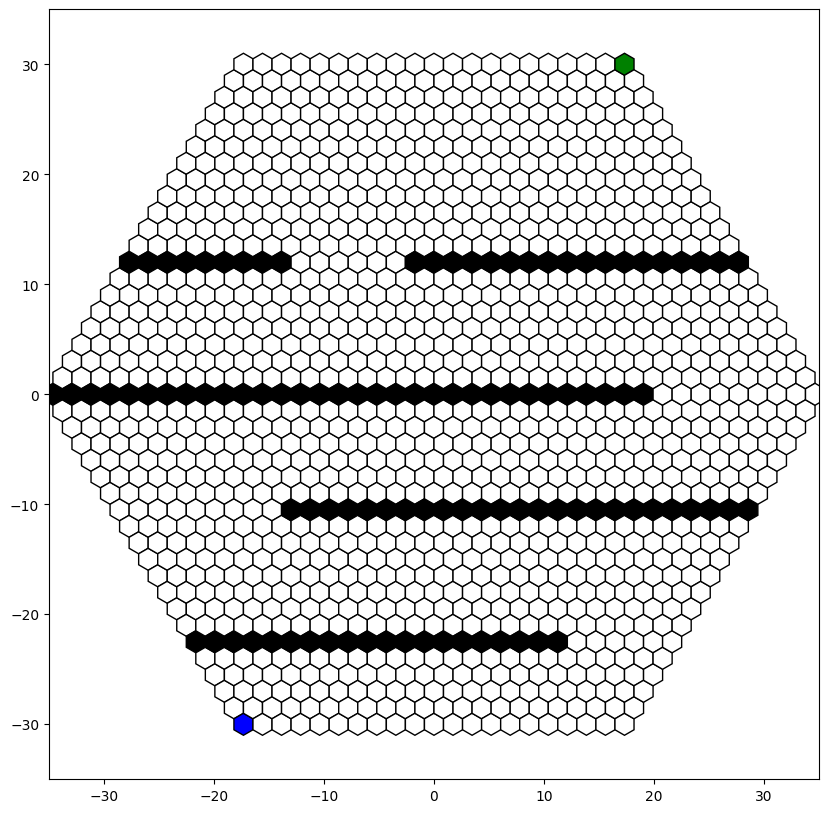

In [55]:
plot_map(hexes, obstacles_locs, agent_start_loc, goal_loc, max_radius, hex_radius)

In [58]:
def save_layout(layout, filename):
    with open(filename, 'wb') as file:
        pickle.dump(layout, file)

In [61]:
save_layout(hex_layout, hex_layout['filename'])